In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mu0 = 1.2566370612e-6 #N/A^2
pi = np.pi
I = 5e6 #A

In [4]:
def rotate_x(p,theta):
    c = np.cos(theta)
    s = np.sin(theta)
    R = np.array([[1,0,0],[0,c,-s],[0,s,c]])
    return np.dot(R,p)

def int_val(A,B,C):
    return (C-B)/np.sqrt(A-2*B+C)+B/np.sqrt(A)

def mag(ra,rb,r2):
    A = (r2-ra)
    A = np.dot(A,A)
    B = (r2-ra)
    B = np.dot(B,rb-ra)
    C = (rb-ra)
    C = np.dot(C,C)
    k = mu0*I/(4*pi)
    v = np.cross(rb-ra, r2-ra)
    return k*int_val(A,B,C)*v/(np.dot(A,C)-np.dot(B,B)+1e-10)

#tests TRES IMPORTANTS POUR NE RIEN OUBLIER
#en général un oubli = une asymétrie des rôles de ra et rb => erreur
def test():
    ra = np.array([0,0,0])
    rb = np.array([1,0,0])
    p= np.array([-3,2,1])
    ma,mb = mag(ra,rb,p),mag(rb,ra,p)
    print(ma)
    print(mb)
    assert(np.allclose(ma,-mb))
test()

[ 0.         -0.00710878  0.01421757]
[ 0.          0.00710878 -0.01421757]


C:\Users\gabig\AppData\Local\Temp\ipykernel_11592\1241384575.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


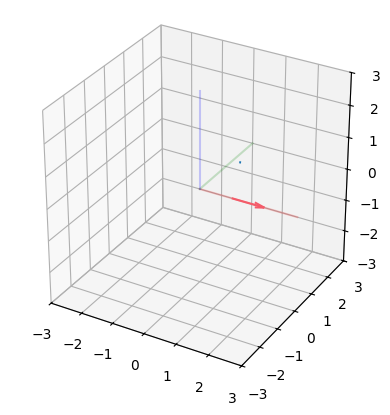

In [5]:
r1 = np.array([1,0,0])
r2 = np.array([2,0,0])
p=np.array([0,1,0])

mag(r1,r2,p)

LIM=3

#do a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

#plot a contour from a list of points
def contour(li):
    x, y, z = zip(*li)
    plt.plot(x,y,z)

#plot x,y,z axes as lines
plt.plot([0,LIM],[0,0],[0,0],'r',alpha=0.2)
plt.plot([0,0],[0,LIM],[0,0],'g',alpha=0.2)
plt.plot([0,0],[0,0],[0,LIM],'b',alpha=0.2)

li = [r1-p,r1+p,r2+p,r2-p,r1-p]
# contour(li)
# fig.patch.set_facecolor("#558C8C")
# ax.set_facecolor("#558C8C")
#plot r2-r1 at location r2
ax.quiver(r1[0],r1[1],r1[2],r2[0]-r1[0],r2[1]-r1[1],r2[2]-r1[2],color="#F45B69")
loc=rotate_x(p, pi/3)
m=mag(r1,r2,loc)

ax.quiver(*(loc+r1),*m)
#plot field M using quivers over whwole space
N=10
for x in np.linspace(-LIM,LIM,N):
    for y in np.linspace(-LIM,LIM,N):
        for z in np.linspace(-LIM,LIM,N):
            loc = np.array([x,y,z])
            m = mag(r1,r2,loc)
            m=m+mag(r2,r1,loc)
            ax.quiver(x,y,z,*m,color="#67597A")

#plot the intensity of the field intersecting the XZ plane


ax.set_xlim(-LIM,LIM)
ax.set_ylim(-LIM,LIM)
ax.set_zlim(-LIM,LIM)
ax.set_aspect('equal',adjustable='box')
fig.show()

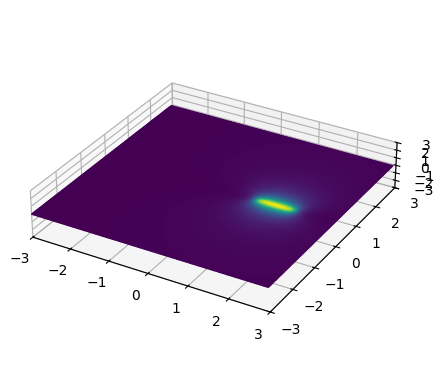

In [6]:
LIM=3

def plot_quadrants(ax, array, fixed_coord, cmap):
    """For a given 3d *array* plot a plane with *fixed_coord*, using four quadrants."""
    nx, ny, nz = array.shape
    index = {
        'x': (nx // 2, slice(None), slice(None)),
        'y': (slice(None), ny // 2, slice(None)),
        'z': (slice(None), slice(None), nz // 2),
    }[fixed_coord]
    plane_data = array[index]

    n0, n1 = plane_data.shape

    min_val = array.min()
    max_val = array.max()

    cmap = plt.get_cmap(cmap)

    facecolors = cmap((plane_data - min_val) / (max_val - min_val))
    X, Y = np.mgrid[0:nx, 0:ny]
    Z = np.zeros_like(X)
    ax.plot_surface(X*2*LIM/(resx+1)-LIM, Y*2*LIM/(resy+1)-LIM, Z, rstride=1, cstride=1,
                            facecolors=facecolors, shade=False)


def figure_3D_array_slices(array, cmap=None):
    """Plot a 3d array using three intersecting centered planes."""
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_box_aspect(array.shape)
    plot_quadrants(ax, array, 'z', cmap=cmap)
    o = np.array([0,0,0.01])
    li = [r1-p+o,r1+p+o,r2+p+o,r2-p+o,r1-p+o]
    contour(li)
    ax.set_xlim(-LIM, LIM)
    ax.set_ylim(-LIM, LIM)
    ax.set_zlim(-LIM, LIM)
    return fig, ax


resx, resy, resz = 110, 110, 21
stepx, stepy, stepz = 2 * LIM / resx, 2 * LIM / resy, 2 * LIM / resz
r_square = np.zeros((resx+1, resy+1, resz+1))
#compute the field for each point in the 3D array
for i, x in enumerate(np.linspace(-LIM, LIM, resx+1)):
    for j, y in enumerate(np.linspace(-LIM, LIM, resy+1)):
        for k, z in enumerate(np.linspace(-LIM, LIM, resz+1)):
            loc = np.array([x, y, z])
            m = mag(r1, r2, loc)
            r_square[i, j, k] = np.linalg.norm(m)


figure_3D_array_slices(r_square, cmap='viridis')
plt.show()

<Figure size 640x480 with 0 Axes>

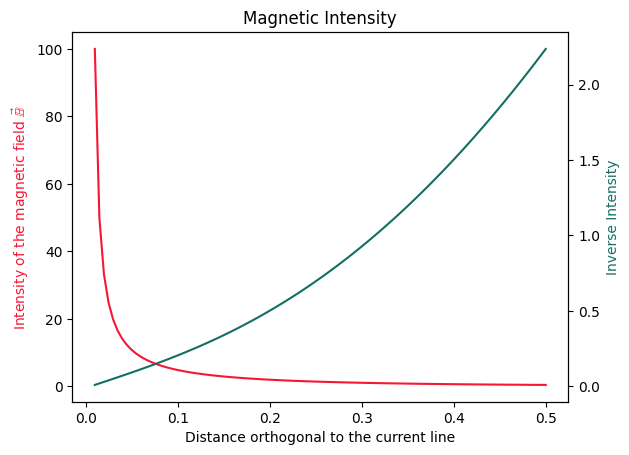

In [7]:
#now plot the intensity between two defined points
START = np.array([1.5,0.01,0])
END = np.array([1.5,1,0])
res = 100
LINE = np.linspace(START, END, res)
intensity = np.zeros(res)
for i, loc in enumerate(LINE):
    m = mag(r1, r2, loc)
    intensity[i] = np.linalg.norm(m)

plt.figure()
fig, ax1 = plt.subplots()
ax1.set_title("Magnetic Intensity")
ax2 = ax1.twinx()
ax1.plot(np.linspace(0.01, 0.5, res), intensity, '#F71735')

ax2.plot(np.linspace(0.01, 0.5, res), (1/(intensity)), color="#136F63")

ax1.set_xlabel('Distance orthogonal to the current line')
ax1.set_ylabel('Intensity of the magnetic field $\\vec\mathbb{B}$', color='#F71735')
ax2.set_ylabel('Inverse Intensity', color='#136F63')
plt.show()
